In [17]:
import numpy as np
import pandas as pd
import sys
import os

In [18]:
from sklearn import datasets

data=datasets.load_iris()

In [19]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [20]:
X=pd.DataFrame(data.data,columns=["SepalLength","SepalWidth","PetalLength","PetalWidth"])

In [21]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
y=pd.DataFrame(data.target,columns=["Species"])

In [23]:
data=pd.concat([X,y],axis=1)

In [24]:
data.to_csv("iris.csv",index=False)

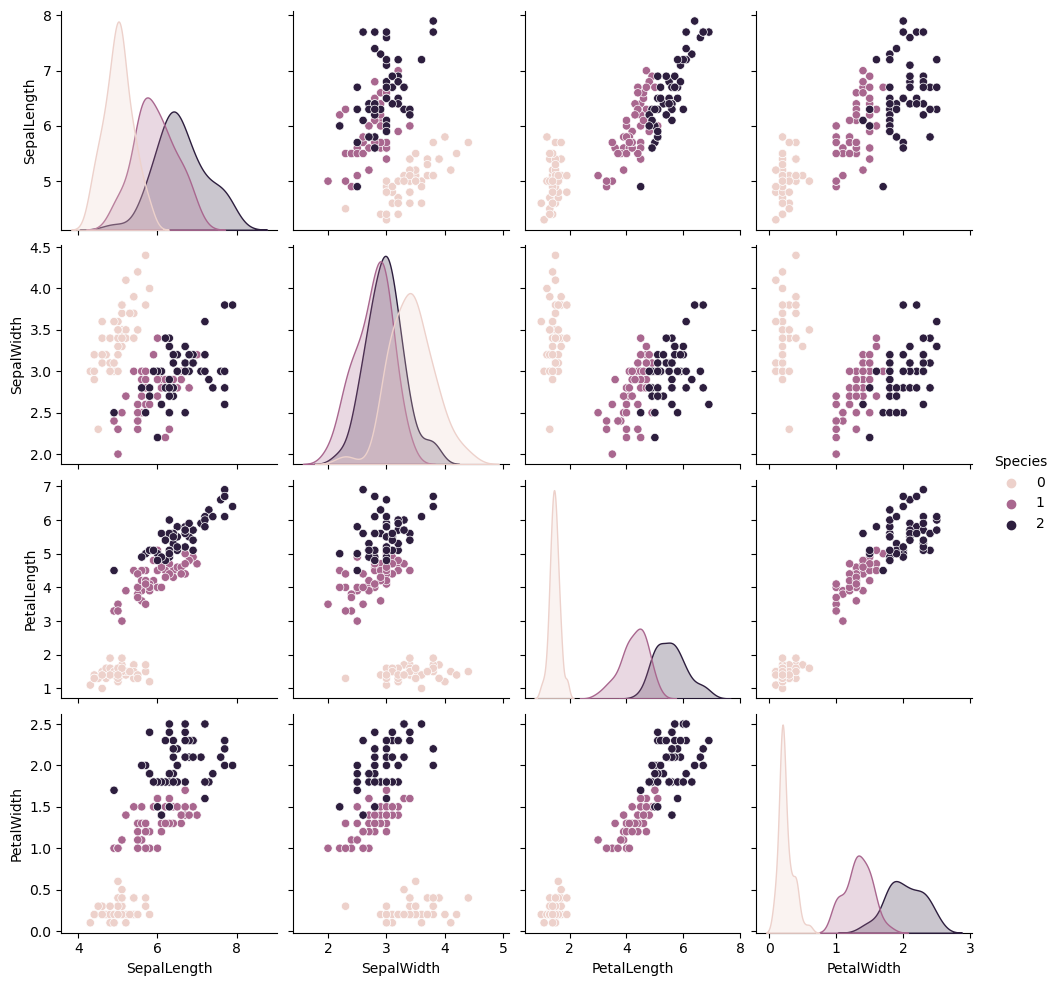

In [25]:
import seaborn as sns
sns.pairplot(data,hue="Species")

we would remove the third class which is like segregated you can see
in the lightest colour dots and we would create the classfier on the two
overlapping classes.

In [26]:
optimised_data=data[data["Species"]!=0][["SepalLength","SepalWidth","Species"]]

In [44]:
optimised_data

SepalLength  SepalWidth  Species
50           7.0         3.2        1
51           6.4         3.2        1
52           6.9         3.1        1
53           5.5         2.3        1
54           6.5         2.8        1
..           ...         ...      ...
145          6.7         3.0        2
146          6.3         2.5        2
147          6.5         3.0        2
148          6.2         3.4        2
149          5.9         3.0        2

[100 rows x 3 columns]

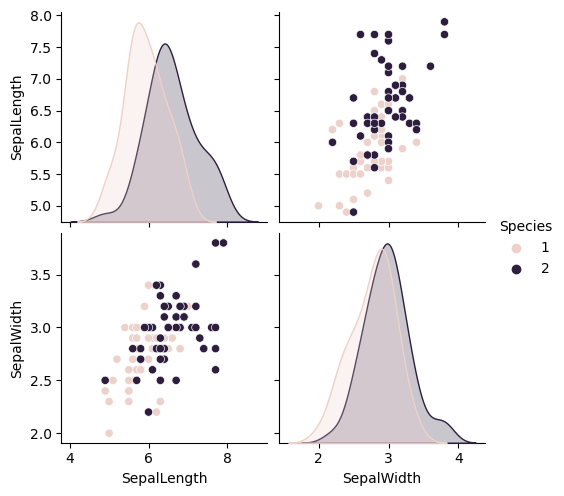

In [45]:
sns.pairplot(optimised_data,hue="Species")

In [46]:
optimised_data.shape

(100, 3)

In [47]:
X=optimised_data.iloc[:,0:2]

In [48]:
y=optimised_data.iloc[:,-1]

In [49]:
X

SepalLength  SepalWidth
50           7.0         3.2
51           6.4         3.2
52           6.9         3.1
53           5.5         2.3
54           6.5         2.8
..           ...         ...
145          6.7         3.0
146          6.3         2.5
147          6.5         3.0
148          6.2         3.4
149          5.9         3.0

[100 rows x 2 columns]

In [50]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 100, dtype: int32

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
clf1=LogisticRegression()
clf2=RandomForestClassifier()
clf3=KNeighborsClassifier()

In [54]:
estimators=[('lr',clf1),('rf',clf2),('knn',clf3)]

In [55]:
estimators[0]

('lr', LogisticRegression())

In [56]:
estimators[1]

('rf', RandomForestClassifier())

In [57]:
estimators[2]

('knn', KNeighborsClassifier())

In [58]:
for estimator in estimators:
    print(cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy'))

[0.5 0.7 0.8 0.8 0.8 0.5 0.9 0.8 0.9 0.8]
[0.3 0.7 0.5 0.7 0.5 0.5 0.8 0.8 0.7 0.7]
[0.5 0.6 0.6 0.6 0.7 0.5 0.8 0.7 0.7 0.5]


In [59]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.63
knn 0.62


# Hard  Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
estimators

[('lr', LogisticRegression()),
 ('rf', RandomForestClassifier()),
 ('knn', KNeighborsClassifier())]

In [63]:
VotingClassifier(estimators=estimators)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())])

In [64]:
VC=VotingClassifier(estimators=estimators,voting='hard')

In [71]:
vca=cross_val_score(VC,X,y,cv=10,scoring='accuracy')

In [72]:
np.round(np.mean(vca),2)

0.66

# Soft Voting Classifier

In [67]:
VC2=VotingClassifier(estimators=estimators,voting='soft')

In [73]:
vcb=cross_val_score(VC2,X,y,cv=10,scoring='accuracy')

In [74]:
np.round(np.mean(vcb),2)

0.65